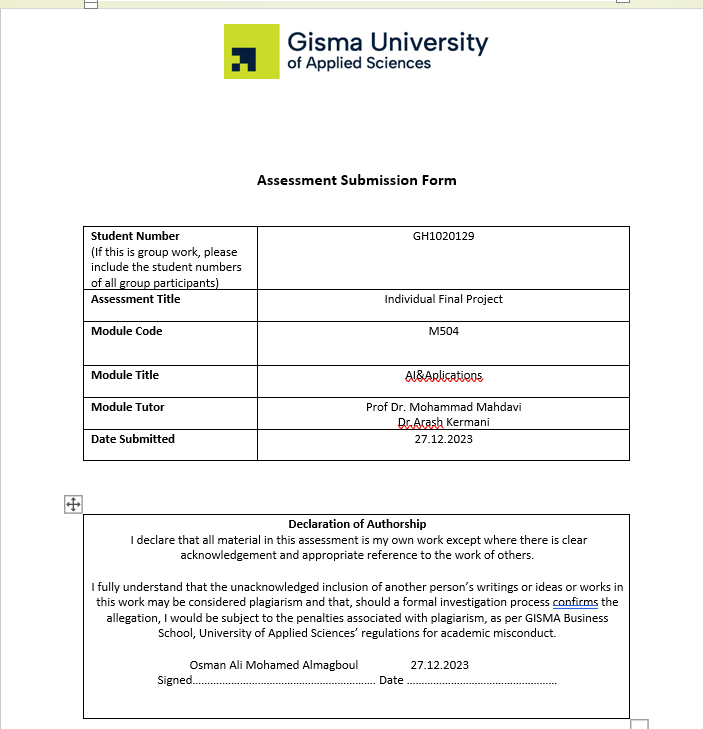

In [74]:
from IPython.display import Image

uploaded_filename = 'm504.png'

Image(filename=uploaded_filename)

#Udemy Courses Analysis
#M504(AI&Applications)
##Student Id:GH1020129
##Date:27.12.2023
##data source:https://www.kaggle.com/datasets/andrewmvd/udemy-courses/data

#Introduction:In this task I am going to analyze the Udemy courses data set as to find good insights and answer some of the most important business questions.

#1.Getting the Data

##1.1 Import the Liberaries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##1.2 Loading and Inspecting the Data

##Load the dataset as csv file using pandas,then use the head() method to show the first five raws.



In [76]:
df = pd.read_csv("udemy_courses.csv")
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


#2.Data Pre-processing & Data Exploration

##2.1 See the data shape

In [77]:
df.shape

(3678, 12)

##comment:the dataset contains 3678 rows and 12 columns

##2.2 Checking the missing values

In [78]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

##comment:there is no missing values

##2.3 Getting more insight about the data by using info

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


##2.4 Checking the duplication

In [80]:
df.duplicated().sum()

6

In [81]:
df['course_id'].nunique()

3672

##Get rid of the duplication

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.duplicated().sum()

0

##2.5 Getting more understanding

In [84]:
df.describe().round(2)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3672.00,3672.00,3672.00,3672.00,3672.00,3672.00
mean,675897.70,66.10,3190.59,156.37,40.14,4.10
std,343071.95,61.04,9488.11,936.18,50.42,6.06
min,8324.00,0.00,0.00,0.00,0.00,0.00
25%,407761.50,20.00,111.75,4.00,15.00,1.00
50%,687692.00,45.00,912.00,18.00,25.00,2.00
75%,960814.00,95.00,2548.75,67.00,46.00,4.50
max,1282064.00,200.00,268923.00,27445.00,779.00,78.50


In [85]:
df["subject"].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [86]:
df["level"].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [87]:
df['published_timestamp'].unique()

array(['2017-01-18T20:58:58Z', '2017-03-09T16:34:20Z',
       '2016-12-19T19:26:30Z', ..., '2015-12-30T16:41:42Z',
       '2016-08-11T19:06:15Z', '2014-09-28T19:51:11Z'], dtype=object)

In [88]:
pd.to_datetime(df['published_timestamp'])

0      2017-01-18 20:58:58+00:00
1      2017-03-09 16:34:20+00:00
2      2016-12-19 19:26:30+00:00
3      2017-05-30 20:07:24+00:00
4      2016-12-13 14:57:18+00:00
                  ...           
3673   2016-06-14 17:36:46+00:00
3674   2017-03-10 22:24:30+00:00
3675   2015-12-30 16:41:42+00:00
3676   2016-08-11 19:06:15+00:00
3677   2014-09-28 19:51:11+00:00
Name: published_timestamp, Length: 3672, dtype: datetime64[ns, UTC]

In [89]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [90]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [91]:
df['published_timestamp'].dt.year

0       2017
1       2017
2       2016
3       2017
4       2016
        ... 
3673    2016
3674    2017
3675    2015
3676    2016
3677    2014
Name: published_timestamp, Length: 3672, dtype: int64

##2.6 Add 3 new columns

In [92]:
df['year']=df['published_timestamp'].dt.year

In [93]:
df['month']=df['published_timestamp'].dt.month

In [94]:
df['quarter']=df['published_timestamp'].dt.quarter

In [95]:
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,quarter
2638,993754,Django Core | A Reference Guide to Core Django...,https://www.udemy.com/django-core/,True,195,16282,303,159,Intermediate Level,18.5,2016-10-29 19:28:45+00:00,Web Development,2016,10,4
2507,1002030,Web Development w/ Google’s Go (golang) Progra...,https://www.udemy.com/go-programming-language/,True,65,4872,662,171,Intermediate Level,19.0,2017-01-17 22:30:33+00:00,Web Development,2017,1,1


##2.7 Timeseris Analysis

In [96]:
#df.set_index(df['published_timestamp'],inplace=True)
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,quarter
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,3,1
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,12,4
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017,5,2
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,2016,6,2
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,2017,3,1
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,2015,12,4
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,2016,8,3


In [97]:
#df.set_index(df['year'])


| subject | value |
| --- | --- |
| Business Finance | 100 |
| Web Development | 200 |
| Graphic Design | 400 |

In [98]:
df['year'].value_counts()

2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: year, dtype: int64

In [99]:
(df['price'] * df['num_subscribers'])

0       429400
1       209400
2        97830
3       232845
4       255200
         ...  
3673    104000
3674      7650
3675     20520
3676     15000
3677     40545
Length: 3672, dtype: int64

In [100]:
df['profit'] = (df['price'] * df['num_subscribers'])

In [101]:
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,quarter,profit
2932,1038786,JavaScript from Beginner to Advanced,https://www.udemy.com/javascript-from-beginner...,True,195,395,18,57,All Levels,17.0,2016-12-20 21:32:57+00:00,Web Development,2016,12,4,77025
1631,364986,Apple Watch Design,https://www.udemy.com/apple-watch-design/,True,20,9847,24,35,All Levels,4.0,2014-12-29 04:59:24+00:00,Graphic Design,2014,12,4,196940


In [102]:
# df[df.duplicated(subset='course_id')]


In [103]:
price_dict = {0:"Free",
              range(20,55,5):"20-50",
              range(55,105,5):"55-100",
              range(105,155,5):"105-150",
              range(155,205,5):"155-200"}



In [104]:
df["price_cat"]=df["price"].replace(price_dict)

In [105]:
df['price_category']=df["price"].replace(price_dict)

In [106]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,quarter,profit,price_cat,price_category
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1,1,429400,155-200,155-200
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,3,1,209400,55-100,55-100
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,12,4,97830,20-50,20-50


#3.EDA & Business Questions

##3.1 Subject Uni-Vriate Analysis

In [107]:
df['subject']

0       Business Finance
1       Business Finance
2       Business Finance
3       Business Finance
4       Business Finance
              ...       
3673     Web Development
3674     Web Development
3675     Web Development
3676     Web Development
3677     Web Development
Name: subject, Length: 3672, dtype: object

In [108]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

<Axes: >

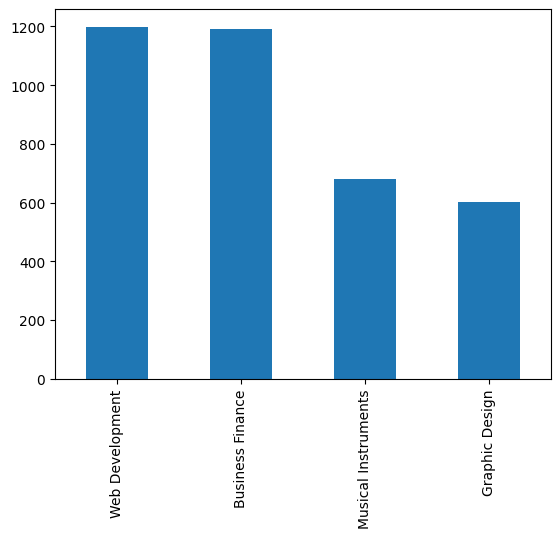

In [109]:
df['subject'].value_counts().plot(kind='bar')

In [110]:
# df['subject'].value_counts().plot(kind='pie')

#3.2 Bi-variate analysis

#Q1.How many subscribers in each subject?

In [111]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,quarter,profit,price_cat,price_category
2879,484872,Learn How to Create Your Own Social Network,https://www.udemy.com/create-your-own-social-n...,True,50,4732,5,14,All Levels,2.0,2015-04-24 23:54:06+00:00,Web Development,2015,4,2,236600,20-50,20-50


In [112]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7937287
Name: num_subscribers, dtype: int64

In [113]:
fig = px.bar(data_frame = df,
       x = df.groupby('subject')['num_subscribers'].sum().index,
      y = df.groupby('subject')['num_subscribers'].sum().values)
fig.update_xaxes(title='subject')
fig.update_yaxes(title='num of subscribers')
fig.show()


##comment:it is very clear that the web development course has the high number of subscribers(almost 8 million subsribers)

#Q2.What is the total Profit made by each subject?

In [114]:
df.groupby('subject',as_index=False)['profit'].sum().sort_values(by='profit',ascending=False)

,subject,profit
3,Web Development,627597400
0,Business Finance,123735315
1,Graphic Design,76983170
2,Musical Instruments,53359055


In [115]:
df.groupby('subject',as_index=False)['profit'].sum().sort_values(by='profit',ascending=False)['subject']

3        Web Development
0       Business Finance
1         Graphic Design
2    Musical Instruments
Name: subject, dtype: object

In [116]:
df.groupby('subject',as_index=False)['profit'].sum().sort_values(by='profit',ascending=False)['profit']

3    627597400
0    123735315
1     76983170
2     53359055
Name: profit, dtype: int64

In [117]:
dict(df.groupby('subject')['profit'].sum())

{'Business Finance': 123735315,
 'Graphic Design': 76983170,
 'Musical Instruments': 53359055,
 'Web Development': 627597400}

<Axes: xlabel='subject'>

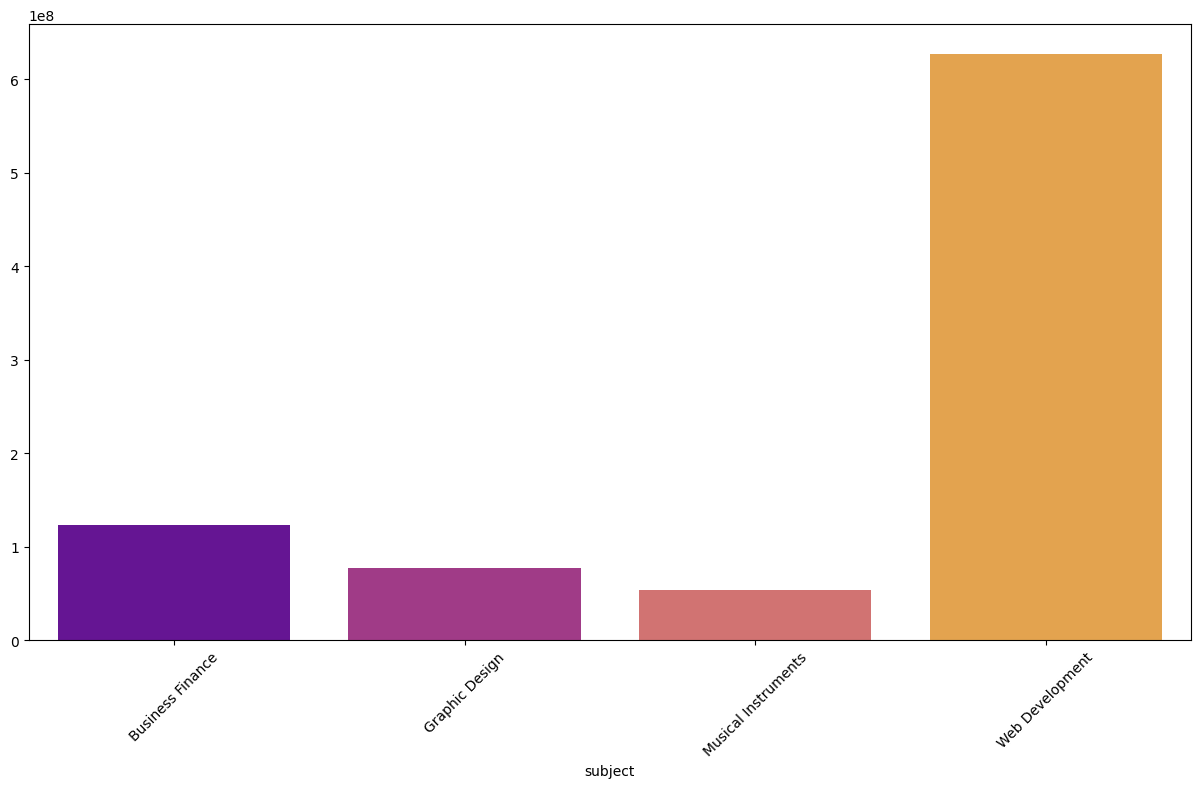

In [118]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data=df,
             x = df.groupby('subject')['profit'].sum().index,
      y = df.groupby('subject')['profit'].sum().values,
      palette='plasma')

##comment as we can see the most high prophit made by web development(about 627Million) folowed by business finance(about 123 Million)

#3.3 Multi-variate Analysis

#Q3.How many courses in each subject,regarding paid/unpaid?

In [119]:
# df['is_paid']

In [120]:
# df.groupby('subject')

In [121]:
df.groupby(['subject','is_paid'], as_index=True)['course_id'].count()

subject              is_paid
Business Finance     False        96
                     True       1095
Graphic Design       False        35
                     True        567
Musical Instruments  False        46
                     True        634
Web Development      False       133
                     True       1066
Name: course_id, dtype: int64

In [122]:
# df['is_paid']==False

index

In [123]:
df[df['is_paid']==False].head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,quarter,profit,price_cat,price_category
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23 22:19:57+00:00,Business Finance,2017,3,1,0,Free,Free
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.50,2013-12-25 19:53:34+00:00,Business Finance,2013,12,4,0,Free,Free


##for unpaid

In [124]:
# df[df['is_paid']==False]['subject'].value_counts()

In [125]:
# df['unpaid']=df['is_paid']==False

In [126]:
# df[df['is_paid']==False]['subject'].value_counts().plot(kind='bar')

##paid courses

In [127]:
# df[df['is_paid']==True]['subject'].value_counts().plot(kind='bar')

In [128]:
fig = px.bar(data_frame = df,
       x = df['subject'],
    color = df['is_paid'])
fig.update_xaxes(title='subject')
fig.update_yaxes(title='courses')
fig.show()


##comment:It is clear that paid courses is by far more than unpaid ones.

#Q4.How many courses in each subject,regarding price category?

<Axes: xlabel='subject', ylabel='count'>

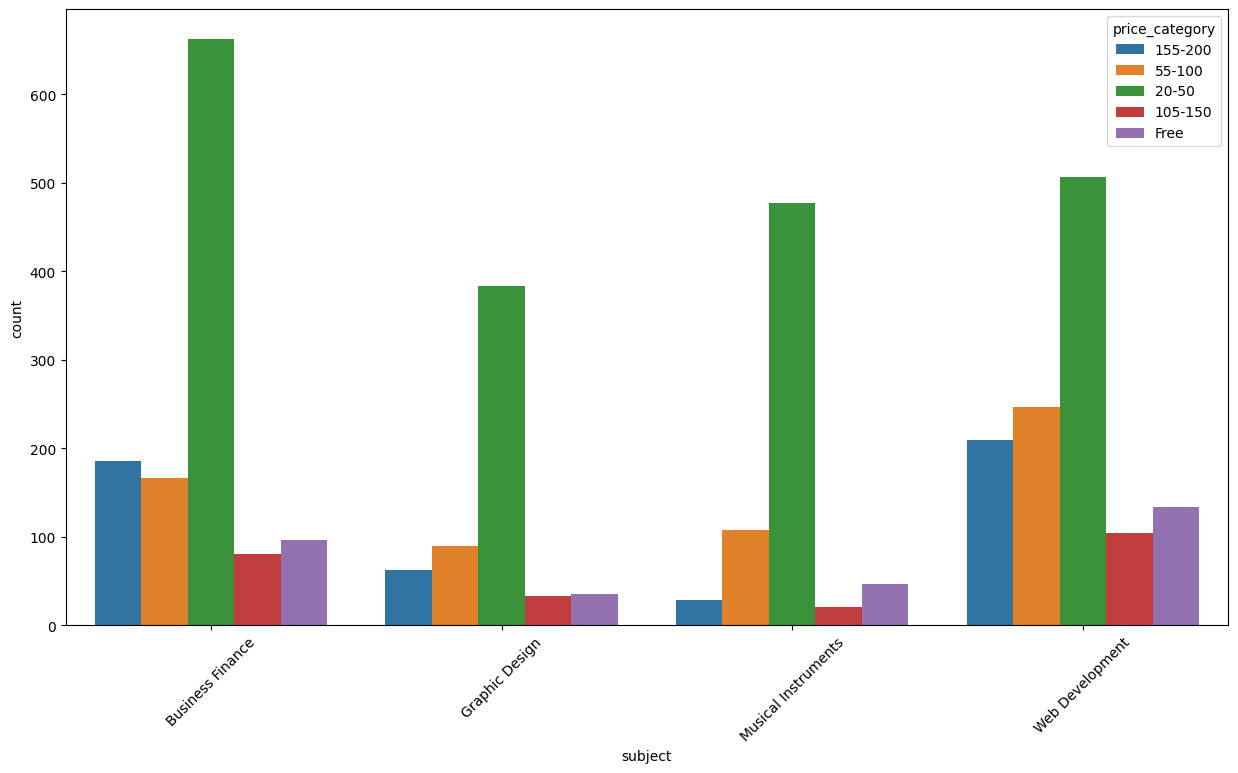

In [129]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data=df, x=df['subject'],hue=df['price_category'])


##comment:as we see the most price category used is between 20 to 50 dollar.This means the company should consentrate more on this category and can add more courses to them.

#Q5.How many courses in each subject,regarding courses levels?

<Axes: xlabel='subject', ylabel='count'>

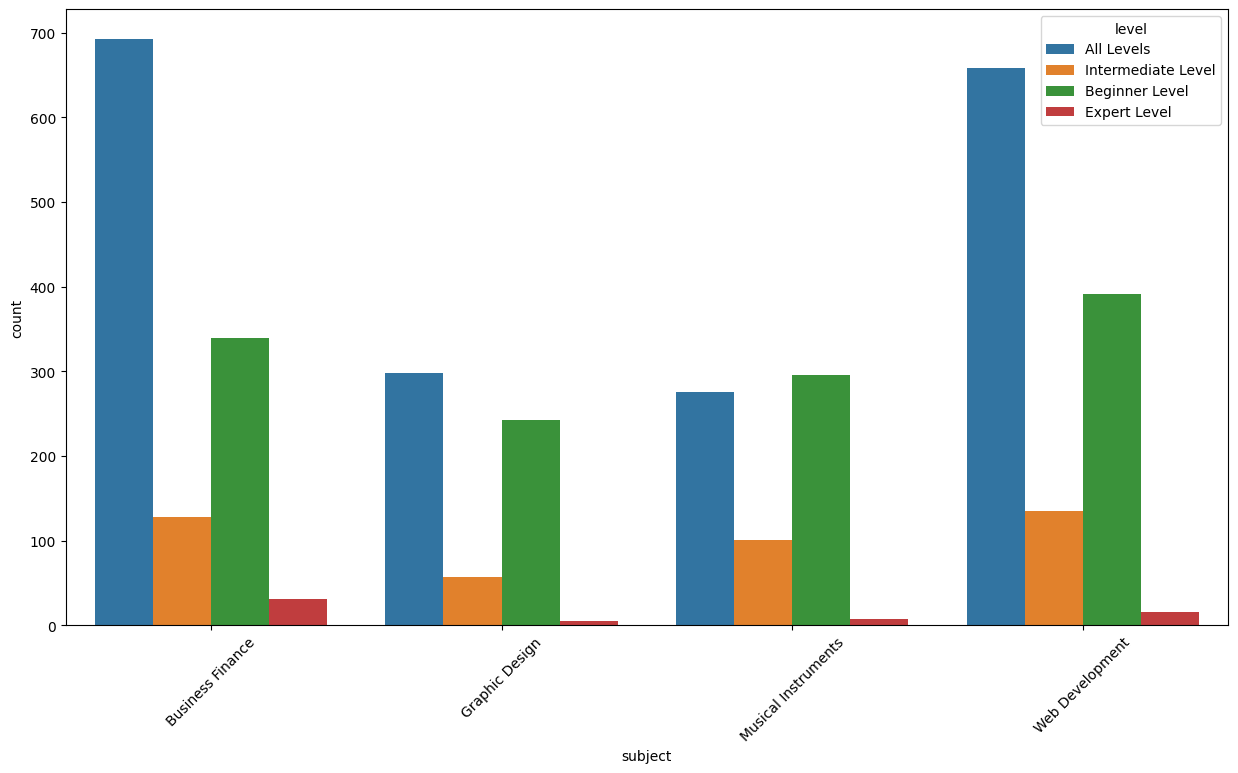

In [130]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data=df, x=df['subject'],hue=df['level'])


##comment:as we can see all levels is the most targeted one. That is means most people like to study from a to z.

#3.1 Sales Summary Script

##First:Calculate total sales, average order value, and most popular courses


In [131]:
total_sales = (df['num_subscribers'] * df['price']).sum()
print(f"Total Sales: ${total_sales:.2f}")

Total Sales: $881674940.00


###comment:as we see total sales is"$881674940.00".

##Second:average order value

In [132]:
average_order_value = total_sales / len(df)
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $240107.55


###comment:The average order value is $240107.55

##Finaly:most popular courses

In [133]:
most_popular_courses = df.groupby('course_title')['num_subscribers'].sum().idxmax()
print(f"Most Popular Course: {most_popular_courses}")

Most Popular Course: Learn HTML5 Programming From Scratch


###comment:the most popular course is  "Learn HTML5 Programming From Scratch"

#3.2 Customer Behavior Analysis Script:

##First,Identify top customers based on total spending

In [134]:
top_customers = df.groupby('course_title')['num_subscribers'].sum().reset_index().nlargest(5, 'num_subscribers')
print(f"Top Courses:\n{top_customers}")

Top Courses:
                                           course_title  num_subscribers
2108               Learn HTML5 Programming From Scratch           268923
757                      Coding for Entrepreneurs Basic           161029
3296                         The Web Developer Bootcamp           121584
592   Build Your First Website in 1 Week with HTML5 ...           120291
3227              The Complete Web Developer Course 2.0           114512


##Second, analyze distribution of order frequencies

In [135]:
order_frequencies = df['num_subscribers'].value_counts().tolist()
print(f"Order Frequencies:\n{order_frequencies}")

Order Frequencies:
[65, 49, 28, 27, 26, 26, 24, 23, 19, 18, 18, 18, 17, 16, 13, 12, 12, 12, 12, 11, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

##Finaly, giving insights into repeat customers

In [136]:
repeat_customers = df[df.duplicated(subset='course_title', keep=False)]
print(f"Repeat Courses:\n{repeat_customers}")

Repeat Courses:
      course_id                                       course_title  \
1301     692920  Creating an animated greeting card via Google ...   
1334     699376  Creating an animated greeting card via Google ...   
1447     699380  Creating an animated greeting card via Google ...   
2062      99324                      Acoustic Blues Guitar Lessons   
2067     112314                      Acoustic Blues Guitar Lessons   
2130     217628             Aprende a tocar el acordeón de botones   
2158     647276                      Acoustic Blues Guitar Lessons   
2332    1152334             Aprende a tocar el acordeón de botones   
2375     818786                         Drum Lessons For Beginners   
2445     210020                         Drum Lessons For Beginners   
2607     178640                    Introduction to Web Development   
2660      99986                    Introduction to Web Development   
2806     674608  The Complete Web Developer Masterclass: Beginn...   
2877

#3.3 Product Popularity Script:

##First: Identify best-selling categories

In [137]:
best_selling_categories = df.groupby('subject')['num_subscribers'].sum().reset_index().nlargest(3, 'num_subscribers')

#use Seaborn for to plot the result

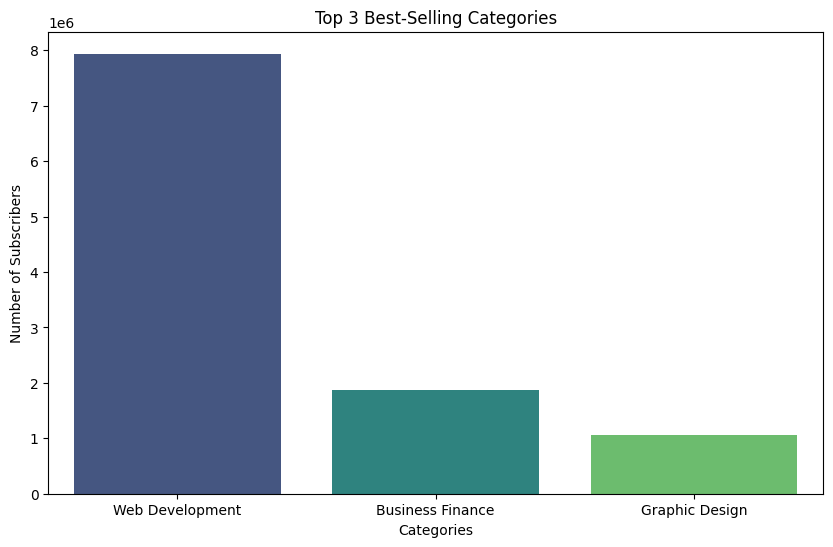

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='num_subscribers', data=best_selling_categories, palette='viridis')
plt.xlabel('Categories')
plt.ylabel('Number of Subscribers')
plt.title('Top 3 Best-Selling Categories')
plt.show()


##comment:it is clear that the best seling course is web develpment folloed by business finance and graphic design respectively.

##Second: Calculate revenue contribution of each course category

In [139]:
revenue_contribution = (df['num_subscribers'] * df['price']).groupby(df['subject']).sum()

##visualizing the result in (bar chart)

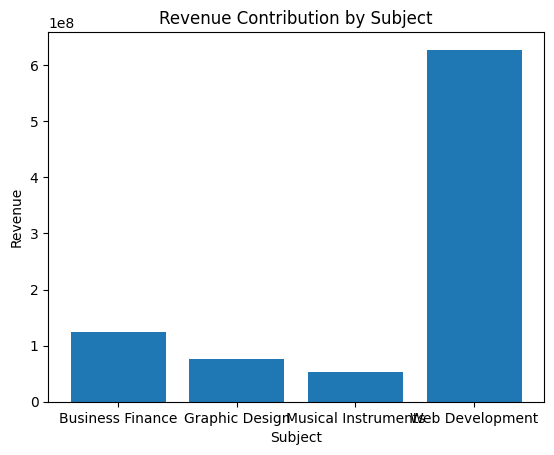

In [140]:
plt.bar(revenue_contribution.index, revenue_contribution.values)
plt.xlabel("Subject")
plt.ylabel("Revenue")
plt.title("Revenue Contribution by Subject")
plt.show()


##comment:it is clear that web development course has high revenue.